<a href="https://colab.research.google.com/github/kindeerrrr/first_repository/blob/main/exsam_analiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1: Работа с массивами NumPy (6 баллов)


**Цель:** Проверить знание методов NumPy для анализа данных.

**Задание:**

1. Создайте массив случайных чисел (50 элементов) из диапазона [10, 100].
2. Найдите:
    - Среднее арифметическое массива.
    - Медиану.
    - Стандартное отклонение.
3. Создайте новый массив, где каждое число изначального массива делится на 3. Отфильтруйте числа, которые делятся без остатка.

**Ожидаемый ответ:**

- Вывод среднего, медианы, стандартного отклонения.
- Новый массив и его фильтр.

**Критерии оценки:**
- Верное использование методов NumPy для вычислений - 3 балла.
- Корректное создание и фильтрация массивов - 3 балла.


In [7]:
import numpy as np

# Генерация 50 чисел в диапазоне от 10 до 100
random_numbers = np.random.randint(10, 100, 50)
print(random_numbers)


[22 55 78 87 84 36 54 74 48 24 77 45 11 26 67 11 15 42 56 66 25 82 35 27
 81 87 31 49 57 83 59 59 50 21 80 18 77 65 40 21 16 46 64 93 47 66 26 55
 69 15]


In [15]:
mean_numbers = random_numbers.mean()        # Среднее значение
median_numbers = np.median(random_numbers)  # Медиана
std_numbers = random_numbers.std()          # Стандартное отклонение

print(f'Среднее арифметическое всех чисел: {mean_numbers}')
print(f'Медиана диапазона равна: {median_numbers}')
print(f'Стандартное отклонение диапазона равно: {round(std_numbers, 2)}')

Среднее арифметическое всех чисел: 50.44
Медиана диапазона равна: 52.0
Стандартное отклонение диапазона равно: 23.89


In [30]:
# Массив с изначальными числами, деленный на 3
data = np.array(random_numbers) / 3

# Маска для проверки на целочисленность
mask = (data == np.floor(data))

# Фильтрация для вывода только целых значений
filtered = data[mask]

print(f'Новый массив, где все числа - результат деления первого массива на 3: {np.round(data, 1)}')
print(f'Фильтр на целочисленное деление: {filtered}')

Новый массив, где все числа - результат деления первого массива на 3: [ 7.3 18.3 26.  29.  28.  12.  18.  24.7 16.   8.  25.7 15.   3.7  8.7
 22.3  3.7  5.  14.  18.7 22.   8.3 27.3 11.7  9.  27.  29.  10.3 16.3
 19.  27.7 19.7 19.7 16.7  7.  26.7  6.  25.7 21.7 13.3  7.   5.3 15.3
 21.3 31.  15.7 22.   8.7 18.3 23.   5. ]
Фильтр на целочисленное деление: [26. 29. 28. 12. 18. 16.  8. 15.  5. 14. 22.  9. 27. 29. 19.  7.  6.  7.
 31. 22. 23.  5.]


# Задание 2: Анализ данных с помощью Pandas (9 баллов)

**Цель:** Проверить навыки анализа и обработки данных.

**Данные:** Используйте предоставленный CSV-файл ("sales_data_large.csv"), содержащий данные о продажах с полями:

- date (дата продаж),
- region (регион),
- product (продукт),
- sales (объем продаж).

**Задание:**

1. Загрузите данные из файла.
2. Определите:
    - Общее количество записей.
    - Какие регионы и продукты присутствуют в данных.
3. Подсчитайте:
    - Общие продажи по регионам.
    - Средний объем продаж для каждого продукта.
4. Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.

**Ожидаемый ответ:**

- Итоги анализа данных.
- Построенная сводная таблица.

**Критерии оценки:**
- Правильная загрузка и обработка данных - 5 баллов.
- Корректные подсчеты и построение сводной таблицы - 4 балла.


In [41]:
import pandas as pd

# Загружаем файл с указанным названием
file_name = 'sales_data_large.csv'
data = pd.read_csv(file_name)

# Находим уникальные значения по столбцам region и product
uniq_region = data['region'].unique()
uniq_product = data['product'].unique()

print(f'Общее количество записей в файле "{file_name}" равно: {len(data)} шт.')
print(f'Список регионов, которые есть в файле": {uniq_region}')
print(f'Список продуктов, которые есть в файле": {uniq_product}')

Общее количество записей в файле "sales_data_large.csv" равно: 500 шт.
Список регионов, которые есть в файле": ['West' 'South' 'East' 'North']
Список продуктов, которые есть в файле": ['Widget C' 'Widget B' 'Widget A']


In [51]:
# Считаем общие продажи по регионам
grouped_region = data.groupby('region')['sales'].sum()
print("Общие продажи по регионам:")
print(grouped_region)

print("")

# Находим средний объем продаж для каждого продукта
grouped_sales = data.groupby('product')['sales'].mean()
print("Средний объем продаж по продукту:")
print(grouped_sales)

Общие продажи по регионам:
region
East     29244
North    39605
South    33023
West     35171
Name: sales, dtype: int64

Средний объем продаж по продукту:
product
Widget A    275.424242
Widget B    268.331361
Widget C    278.614458
Name: sales, dtype: float64


In [54]:
# Строим сводную таблицу
pivot = data.pivot_table(values='sales', index='region', columns='product', aggfunc='mean')

print(pivot.round(2))

product  Widget A  Widget B  Widget C
region                               
East       291.46    263.12    271.36
North      289.15    238.48    304.66
South      277.38    282.83    263.72
West       250.11    291.55    267.14


# Задание 3: Очистка данных и визуализация (10 баллов)

**Цель:** Проверить умение находить и исправлять ошибки в данных, а также визуализировать их.

**Данные:** Используйте предоставленный CSV-файл ("sales_cleaning_large.csv"), содержащий данные о продажах с возможными пропущенными и некорректными значениями. Поля:

- date (дата продаж),
- sales (объем продаж),
- region (регион).

**Задание:**

1. Найдите и устраните ошибки в данных:
    - Заполните пропущенные даты.
    - Удалите отрицательные значения в столбце sales или замените их на медиану столбца.
    - Заполните пропущенные значения в sales средним значением.
2. Постройте график продаж по датам. Убедитесь, что даты упорядочены.

**Ожидаемый ответ:**

- Обработанный DataFrame.
- Построенный график.

**Критерии оценивания:**
- Корректная очистка данных - 5 баллов.
- Грамотная визуализация - 5 баллов.

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем файл с указанным названием
file_name_2 = 'sales_cleaning_large.csv'
data_2 = pd.read_csv(file_name_2)

data_2 = data_2.ffill()                          # Заполняем пропущенные даты предыдущим значением
data_2.loc[data_2['sales'] < 0, 'sales'] = np.nan                 # Удаляем значения, где продажи отрицательные

mean_sales = data_2['sales'].mean()                               # Среднее значение столбца 'sales'
data_2['sales'] = data_2['sales'].fillna(round(mean_sales, 2))    # Заполняем пропущенные значения в столбце средним значением


# pd.set_option('display.max_rows', None) - отображаем все строки для проверки значений
# pd.set_option('display.max_rows', 10)  - возвращаем обратно на 10 строк

print(data_2)

           date   sales region
0    2024-12-01  229.63   East
1    2024-12-01  400.00   East
2    2024-12-01  229.63  South
3    2024-12-01  350.00   West
4    2024-12-02  400.00  South
..          ...     ...    ...
195  2024-12-31  400.00   West
196  2024-12-31  229.63   West
197  2024-12-31  229.63  South
198  2024-12-31  229.63   East
199  2024-12-31  229.63  North

[200 rows x 3 columns]


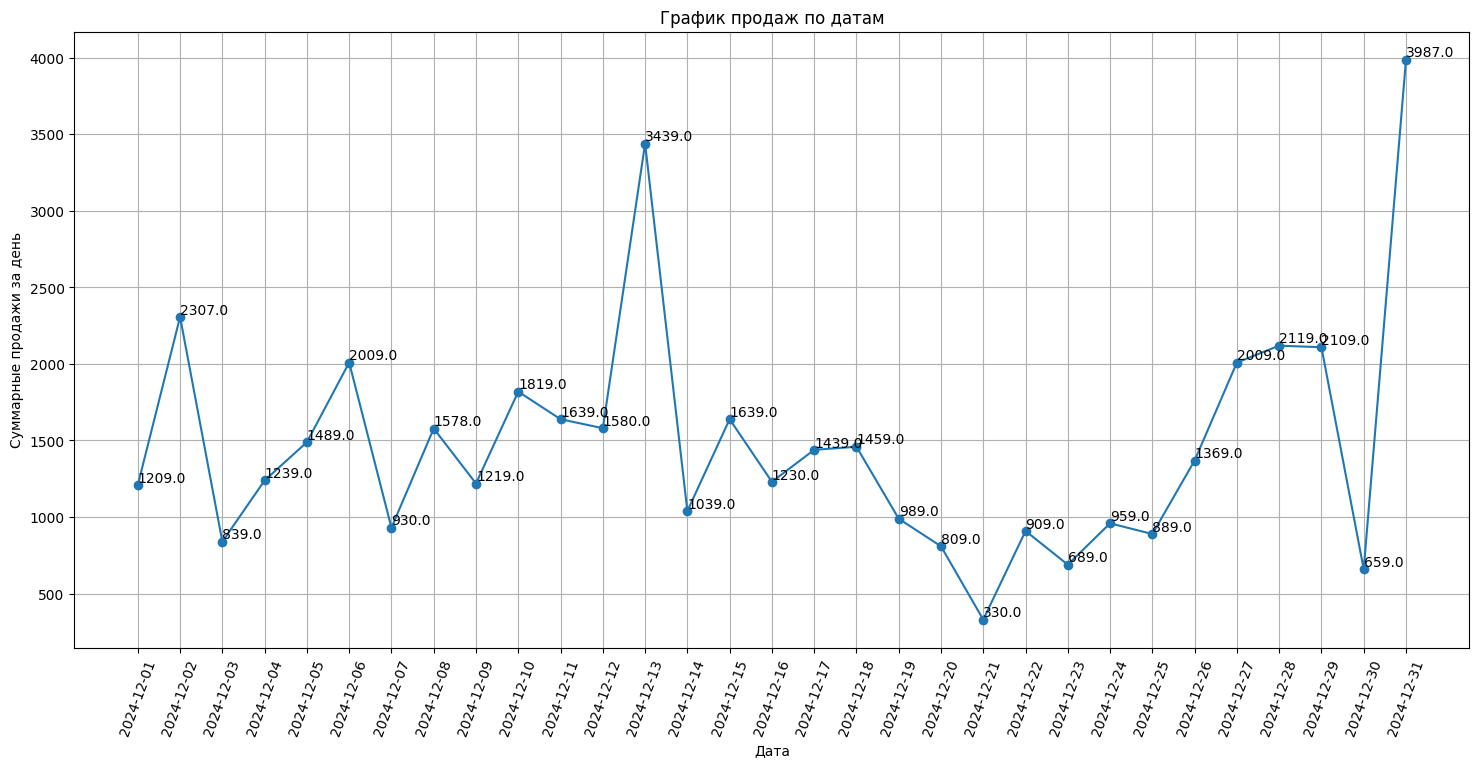

In [106]:
# Строим линейный график

agr_dann = data_2.groupby('date')['sales'].sum().reset_index()
x = agr_dann['date']
y = round(agr_dann['sales'])

# Задаём размер графика (x, y)
plt.figure(figsize=(18, 8))

# Указываем значения для осей и маркер для точек
plt.plot(x, y, marker='o')

# Добавляем подписи для каждой точки
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='left', va='bottom')

# Заголовок
plt.title('График продаж по датам')
# Подпись для оХ
plt.xlabel('Дата')
# Подпись для оУ
plt.ylabel('Суммарные продажи за день')

# Поворачиваем подписи по оси X
plt.xticks(rotation=70)  # Поворот на 70 градусов

plt.grid(True)
plt.show()

# Задание 4: Получение данных из API (6 баллов)

**Цель:** Проверить способность работать с веб-данными.

**Задание:**

1. Используйте открытое API (например, https://jsonplaceholder.typicode.com/users).
2. Загрузите данные и создайте DataFrame с полями: id, name, email, company_name.
3. Выведите таблицу с пользователями, работающими в компаниях, название которых содержит слово "Group".

**Ожидаемый ответ:**

- DataFrame с результатами фильтрации.

**Криетрии оценивания:**
- Корректная работа с API и фильтрация данных - 6 баллов.

In [113]:
import requests
import pandas as pd

# Загружаем данные с API
url = "https://jsonplaceholder.typicode.com/users"  # Указываем URL API, с которого будем получать данные
response = requests.get(url)                        # Отправляем GET-запрос для получения данных с API
data = response.json()                              # Преобразуем полученные данные в формат JSON

# Преобразуем данные в DataFrame
df = pd.DataFrame(data)

# Извлекаем название компании и создаем новый столбец 'company_name'
df['company_name'] = df['company'].apply(lambda x: x['name'])

# Оставляем только необходимые столбцы: id, name, email, company_name
new_data = df[['id', 'name', 'email', 'company_name']]

# Фильтруем по компании, которая содержит слово "Group"
new_data = new_data[new_data['company_name'].str.contains('Group')]

# Выводим результат
print(new_data)

   id                      name                   email     company_name
6   7           Kurtis Weissnat  Telly.Hoeger@billy.biz      Johns Group
7   8  Nicholas Runolfsdottir V    Sherwood@rosamond.me  Abernathy Group
